In [7]:
q = 'anc'

In [8]:

results = twit_search(twitter_api, q ,max_results=10000000)

In [10]:
df = pd.DataFrame(results)
# datatoexcel = pd.ExcelWriter('anc.xlsx', engine='xlsxwriter')
# df.to_excel(datatoexcel, sheet_name='sheet1')
# datatoexcel.save()

In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')

C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
df['created_at'].describe()

count                               1100
unique                               976
top       Sat Oct 09 18:29:46 +0000 2021
freq                                   3
Name: created_at, dtype: object

In [15]:
def find_hashtag(text):
    hashtag = re.findall(r'#(\w+)', text)
    hashtag = ' '.join(hashtag)
    return hashtag

In [16]:
def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop)
    return text

In [17]:
def remove_users(text):
    text = re.sub(r'@(\w+)','', text)
    return text

In [18]:
def lower_case(text):
    text = text.lower()
    return text

In [19]:
def remove_links(text):
    text = re.sub(r'http\S+', '', text)
    return text

In [20]:
def remove_punc(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [21]:
def tokens(text):
    text = nltk.word_tokenize(text)
    text = ' '.join(text)
    return text

In [22]:
df['hashtag'] = df['text'].apply(func = find_hashtag)

In [23]:
df['cleaned_tweet'] = df['text'].apply(func = remove_stopwords)

In [24]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(func = remove_users)

In [25]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(func = lower_case)

In [26]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(func = remove_links)

In [27]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(func = remove_punc)

In [28]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(func = tokens)

In [29]:
import wordcloud
from wordcloud import WordCloud
wc = WordCloud()

In [30]:
tweets = df['cleaned_tweet']
tweets = str(tweets)

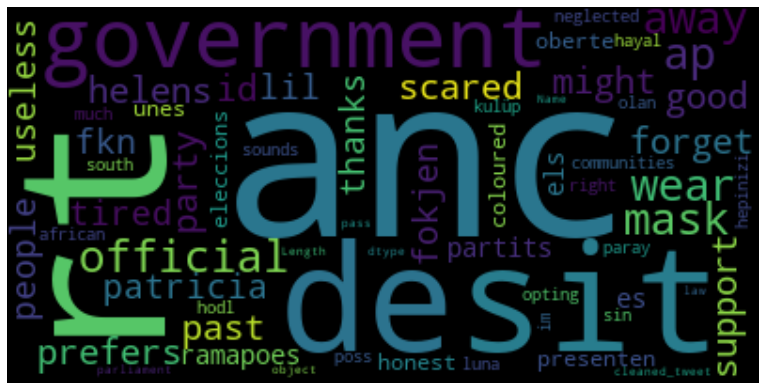

In [31]:
plt.figure(figsize=(12,12))
wc.generate(tweets)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
import textblob
from textblob import TextBlob

In [33]:
def subjectivity(tweet):
    new_tweet = TextBlob(tweet).sentiment.subjectivity
    return new_tweet

In [34]:
def polarity(tweet):
    new_tweet = TextBlob(tweet).sentiment.polarity
    return new_tweet

In [35]:
df['subjectivity'] = df['cleaned_tweet'].apply(func = subjectivity)

In [36]:
df['polarity'] = df['cleaned_tweet'].apply(func = polarity)

In [37]:
def sentiment(tweet):

    
    if tweet < 0:
        
        return 'Negative'
    
    if tweet == 0:
        
        return 'Nuetral'
    
        
    if tweet > 0:
        
        return 'Positive'

In [38]:
df['sentiment'] = df['polarity'].apply(func = sentiment)

<AxesSubplot:>

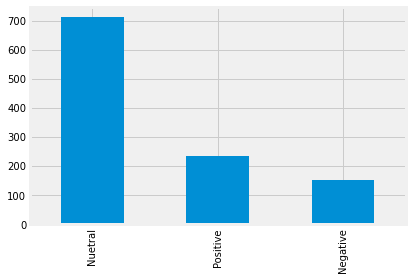

In [39]:
df['sentiment'].value_counts().plot(kind='bar')

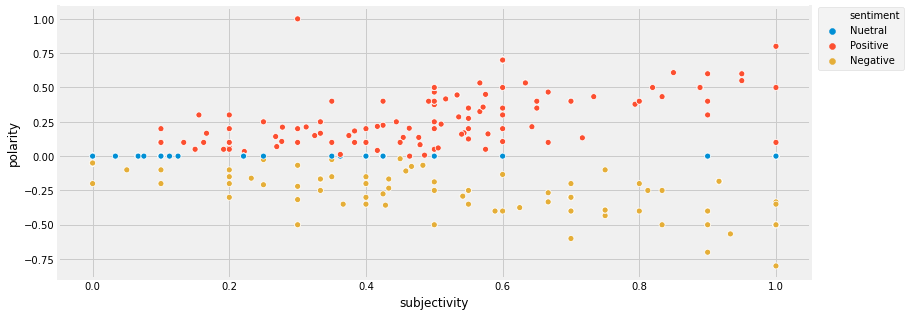

In [40]:
plt.figure(figsize=(12,5))
sns.scatterplot('subjectivity', 'polarity', hue= 'sentiment', data=df)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

In [46]:
negative_tweets = df[df['polarity'] < 0]

In [82]:
positive_tweets = df[df['polarity'] > 0]

In [83]:
text = negative_tweets['cleaned_tweet']
text = str(text)

In [84]:
positive_text = positive_tweets['cleaned_tweet']
positive_text = str(positive_tweets)

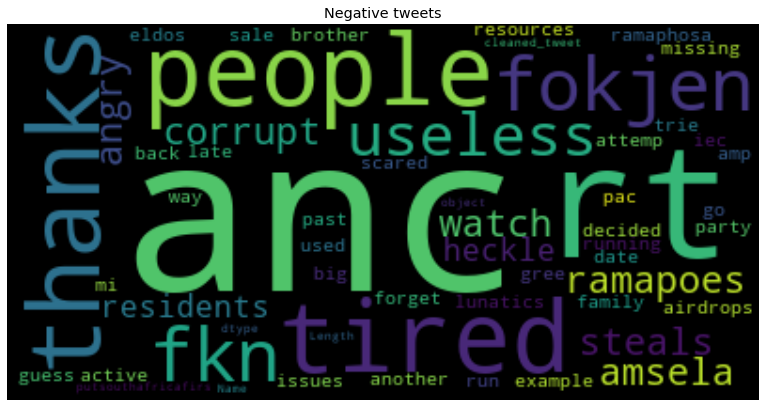

In [85]:
plt.figure(figsize=(12,12))
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative tweets')
plt.show()

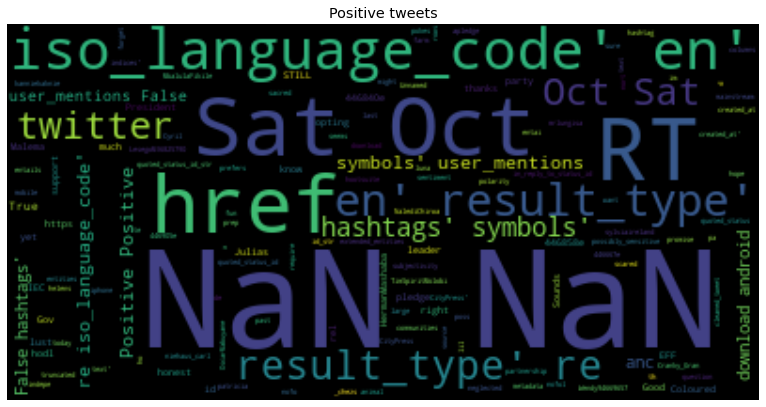

In [86]:
plt.figure(figsize=(12,12))
wc.generate(positive_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive tweets')
plt.show()

In [80]:
negative_tweets['cleaned_tweet'].unique()

array(['people tired anc', 'thanks fokjen anc fkn useless ramapoes',
       'anc steals anc corrupt amsela',
       'rt watch angry residents heckle ramaphosa tries blaze anc campaign trail kzn',
       'i active anc decided go back family party pac',
       'rt we ask stop debating anc eff tv he giving unnecessary relevance opportunity t',
       'rt let easily assist reckless liers get compromised expose stupid lies my life captured',
       'im confused anc cant manage eskom want manage country how i vote fo',
       'rt the anc can not beat da election polls impossible the anc depends heavily ieceffgoodpa p',
       'rt these malicious desperate attempts anc people discredit action sa they cant contest electi',
       'rt watch an angry fikile mbalula telling protesting anc members members drunk bought alcohol he',
       'nope serious dislike well blindness havo',
       'how fuck fucken thieves keep getting work surely first fuckup get blacklisted the',
       'rt watch folweni r

In [62]:
negative_tweets['hashtag'].unique()

array(['', 'ANC Eskom', 'Lunatics', 'TerraAutumn', 'Dickhead Pussio',
       'ActionSA ANC ANCommunists', 'JSCin', 'PutSouthAfricaFirst'],
      dtype=object)

## It looks like some of the positive tweets have a negative context.

In [81]:
positive_tweets['cleaned_twaeet'].unique()

array(['rt anc prefers forget helens past scared might acknowledge good',
       'rt id support good party since patricia de lille seat anc parliament and responsible corrupt bor',
       'rt eff leader julias malema pokes fun anc north west get copy citypress tomorrow more',
       'do know pledge entails apledge sacred promise exactly promised do',
       'thanks president lust hope my last question tendering system anc using looting money',
       'a little light reading anc gov',
       'rt african national congress anc president cyril ramaphosa received warm welcome umbumbulu south durban',
       'the people vote anc are ones enjoy struggling',
       'any situation individuals prevent youths engaging process inquiry one violence',
       'rt sunset clause offer anc likes fw de klerk made whites comfortable sun',
       'its ancs grand strategic plan use azanian economic resources serve interests 15 mi',
       'rt ward 94 perfect demonstration anc wants councillor candidates cou

## Looking at these hashtags used for the positive tweets, it seems like some of them would be used for a negative tweet like, ANC Corruption, PhoenixMassacre, ANCriminals, ANCorruption, ANCommunists.

In [64]:
positive_tweets['hashtag'].unique()

array(['', 'CityPress', 'VoteEFF', 'ANC', 'St',
       'VoteEFFOn1November LandAndJobsManje', 'CR17BankStatements',
       'BuildingBetterCommunities VoteANC ANCCandidates',
       'ActionSA ANC ANCommunists',
       'ActionSA ANC ANCommunists ANCriminals ANCorruption',
       'ActionSA ANC', 'OscarMabuyane NelsonMandela',
       'ANCgov ANC Corruption', 'BuildingBetterCommuniti', 'On',
       'PhoenixMassacre VoetsekANC Mnakwethu AskAMan', 'ANCeThekwini',
       'GE', 'ActionSA ANCommunists', 'analytics googleads facebookads',
       'VaccineCertificate'], dtype=object)

<AxesSubplot:>

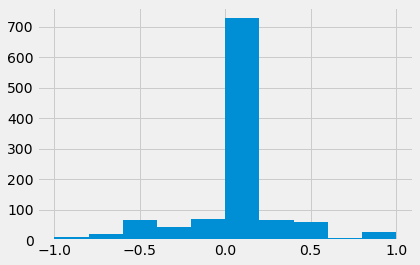

In [313]:
df['polarity'].hist()

<AxesSubplot:>

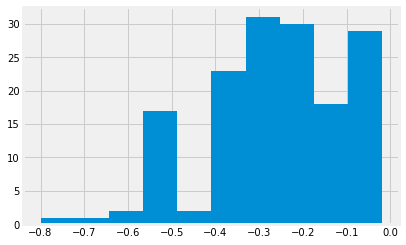

In [65]:
negative_tweets['polarity'].hist()

<AxesSubplot:>

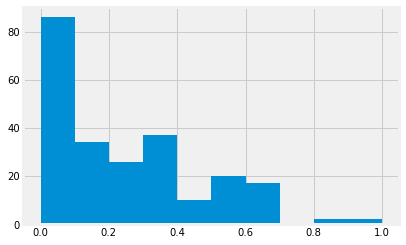

In [68]:
positive_tweets['polarity'].hist()

<AxesSubplot:>

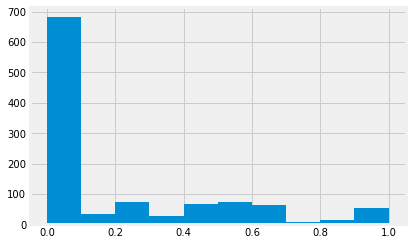

In [67]:
df['subjectivity'].hist()

## More of the negative tweets are based on opinion than fact.  It also depends n the person analyzing these histograms and where you set the threshold between pure fact and opinion.

<AxesSubplot:>

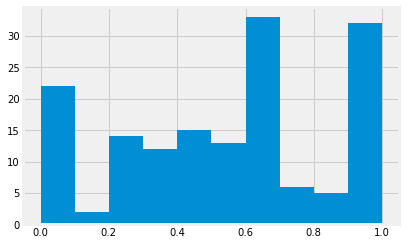

In [66]:
negative_tweets['subjectivity'].hist()

<AxesSubplot:>

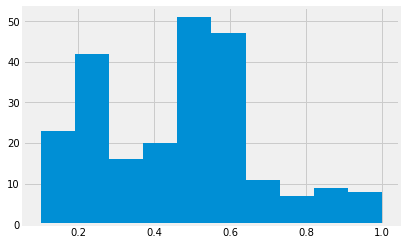

In [69]:
positive_tweets['subjectivity'].hist()